<a href="https://colab.research.google.com/github/Nikkuchan/AIML-Problem-Sets/blob/main/58089_MEX_Gala.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Midterm Problem Set
$_{\text{©D.J. Lopez | 2021 | Fundamentals of Machine Learning}}$

# Problem 1
## 1.1 Lecture Requirement




>The given dataset **"Salary Data"** aims to present the relationship between the years of experience of 30 individuals and their salary. It could show other employees or aspiring job seekers the increase of salary at a certain company given the number of years that they would devote to it. In the case that the employees don't see the increase as desirable or reasonable they may ask for an adjustment for future purposes. The full dataset chosen by the group contains a dataset perfect for linear regression. It contains only two factors previously stated which could be easily substituted for the X and y in the algorithm. The dataset contains multiple features with over two thousand of records. 

## 1.2 Lab Requirement

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
Salary_df = pd.read_csv("Salary_Data.csv") 
Salary_df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


### **Data Exploration, Cleaning, and Visualization**

In [ ]:
Salary_df.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [ ]:
Salary_df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [ ]:
Salary_df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [ ]:
Salary_rank = Salary_df.sort_values(by='Salary', ascending=False)
Salary_rank

,YearsExperience,Salary
28,10.3,122391.0
29,10.5,121872.0
26,9.5,116969.0
23,8.2,113812.0
27,9.6,112635.0
24,8.7,109431.0
25,9.0,105582.0
22,7.9,101302.0
21,7.1,98273.0
19,6.0,93940.0


In [ ]:
#Checking if there are NaN values
is_NaN = Salary_df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = Salary_df[row_has_NaN]
rows_with_NaN

,YearsExperience,Salary


<Figure size 864x432 with 0 Axes>

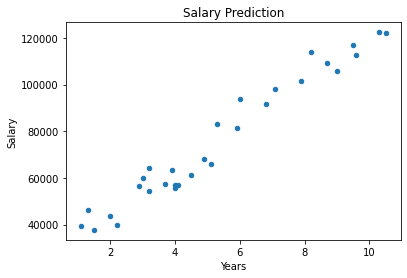

In [ ]:
plt.figure(figsize=(12,6))
Salary_df.plot(x=['YearsExperience'],y=['Salary'],kind='scatter')
plt.xlabel('Years')
plt.ylabel('Salary')                                                      
plt.title('Salary Prediction')
plt.show()

#CORRELATION


In [ ]:
Salary_df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


#VARIABILITY


In [ ]:
var = np.var(Salary_df)
var

YearsExperience    7.785156e+00
Salary             7.264993e+08
dtype: float64

# Probem 2
## 2.1 Lecture Requirement



Since the group decided to find the correlation between the salary and the years of experience of employees, the algorithm to be used in this activity will be Simple Linear Regression. 

**Simple Linear Regression**
> Simple Linear Regression deals with studying the relationship between one independent variable of x to a singe dependent variable y.
$$y = \omega_0 + \omega_1 X \\ _{\text{Eq. 1}}$$

Where $\omega_0$ is the intercept and $\omega_1$ is the slope. 
It is the same formula used in slope-intercept form $y = mx + b$. 

>In Eq. 1, the intercept $\omega_0$ is the positioning of the regression. Meanwhile, the slope  $\omega_1$ is for quantifying the association between variables $X$ and $Y$. In Simple Linear Regression, we base on a straight line to figure out the relationship between the dependent and independent variable and this said line is characterized by the obtained values from intercept and slope. 

Obtaining a negative slope indicates that there is a negative association between variabes $X$ and $Y$. If the sope is positive, the association is positive. Having 0 value indicates that there is no relationship between the two while obtaining a higher positive value for slope would just mean that the association between the two is strong. 


## 2.2 Lab Requirement

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
class LinearRegression_Simple():
 
  ## Coding covariances
  def covariance(self,vectA,vectB):
    covariance = np.round(np.cov(vectA,vectB),2)
    return covariance[0,1]

  ## Coding Pearsons Correlation
  def pearsons_r(self,vectA,vectB):
    R = np.round(np.corrcoef(vectA,vectB)[0,1],3)
    return R
  
  def train(self,X,y):
    std_X, std_y = np.std(X), np.std(y)     # compute for the std.dev of X and y
    rho = np.corrcoef(X,y)[0,1]             # compute for Pearson's R
    w1 = rho*(std_y/std_X)                  # compute for the weights of the bias term
    w0 = y.mean()-w1*X.mean()               # compute for the weights of the feature
    rndwt = np.round((w1,w0),2)
    self.model_ = rndwt
    return rndwt

  # passing the train method to model_ method
  def __init__(self):
    self.model_ = 0

  ## Getting the Predicted Value  
  def predict(self,x):
    std_X, std_y = np.std(X), np.std(y) # compute for the std.dev of X and y
    rho = np.corrcoef(X,y)[0,1]         # compute for Pearson's R
    w1 = rho*(std_y/std_X)              # compute for the weights of the bias term
    w0 = y.mean()-w1*X.mean()           # compute for the weights of the feature
    preds = np.round(np.array(w0+w1*x),2)
    return preds.reshape(-1,1)

  def evaluate(self):
    n = y.size
    n_X = X.size
    k = 1
    y_hat = self.predict(X).reshape(1,n_X)
    sst = np.sum(np.square(y-y.mean()))     #Sum of Squares Total
    ssr = np.sum(np.square(y_hat-y.mean())) #Sum of Squares Regression
    sse = np.sum(np.square(y_hat-y))        #Sum of Squares Error
    mse = np.mean(np.square(y_hat-y))       #Mean of Squared Error
    rmse = np.sqrt(mse)                     #Root Mean Squared Error
    r2 = (1-(sse/sst))                      #R-squared
    ar2 = (1-((1-r2)*(n-1)/(n-k-1)))        #Adjusted R-squared
    dictionary = {'Sum of Squares Total      [SST] ': [sst],
                  'Sum of Squares Regression [SSR] ': [ssr],
                  'Sum of Squares Error      [SSE] ': [sse],
                  'Mean of Squared Error     [MSE] ': [mse],
                  'Root Mean Squared Error   [RMSE]': [rmse],
                  'R-squared                 [R²]  ': [r2],
                  'Adjusted R-squared        [AR²] ': [ar2]}
    return dictionary
  def visualize(self):    
   std_X = np.std(X)
   std_y = np.std(y)
   rho = np.corrcoef(X,y)[0,1]
   w1 = rho*(std_y/std_X)
   w0 = y.mean() - w1*X.mean()
   model_ = w0 + w1*X
   plt.figure(figsize=(5,5), dpi=400)
   plt.grid()
   plt.scatter(X,y)
   plt.plot(X, model_)
   plt.savefig("Linear Regression.jpg")
   plt.show()

In [ ]:
X1 = pd.read_csv("/content/Salary_Data.csv")
y = X1['Salary'].to_numpy()
X = X1.drop('Salary', axis=1).to_numpy()
X = X.reshape(1,-1)

In [ ]:
## TEST #1 (Max pts: 5)
## DO NOT DELETE NOR MODIFY THIS CELL
regressor = LinearRegression_Simple()

In [ ]:
## TEST #2 (Max pts: 5)
## DO NOT DELETE NOR MODIFY THIS CELL
cov = regressor.covariance(X,y)
cov

76106.3

In [ ]:
## TEST #3 (Max pts: 10)
## DO NOT DELETE NOR MODIFY THIS CELL
r = regressor.pearsons_r(X,y)
r

0.978

In [ ]:
## TEST #4 (Max pts: 15)
## DO NOT DELETE NOR MODIFY THIS CELL
regressor.train(X,y)
regressor.model_

array([ 9449.96, 25792.2 ])

In [ ]:
## TEST #5 (Max pts: 25)
## DO NOT DELETE NOR MODIFY THIS CELL
preds = regressor.predict(X)
preds

array([[ 36187.16],
       [ 38077.15],
       [ 39967.14],
       [ 44692.12],
       [ 46582.12],
       [ 53197.09],
       [ 54142.09],
       [ 56032.08],
       [ 56032.08],
       [ 60757.06],
       [ 62647.05],
       [ 63592.05],
       [ 63592.05],
       [ 64537.05],
       [ 68317.03],
       [ 72097.02],
       [ 73987.01],
       [ 75877.  ],
       [ 81546.98],
       [ 82491.97],
       [ 90051.94],
       [ 92886.93],
       [100446.9 ],
       [103281.89],
       [108006.87],
       [110841.86],
       [115566.84],
       [116511.84],
       [123126.81],
       [125016.8 ]])

In [ ]:
model_stats = regressor.evaluate()
model_stats

{'Adjusted R-squared        [AR²] ': [0.9554193888557527],
 'Mean of Squared Error     [MSE] ': [31270961.046540007],
 'R-squared                 [R²]  ': [0.9569566513090026],
 'Root Mean Squared Error   [RMSE]': [5592.044442468247],
 'Sum of Squares Error      [SSE] ': [938128831.3962002],
 'Sum of Squares Regression [SSR] ': [20856848190.276196],
 'Sum of Squares Total      [SST] ': [21794977852.0]}

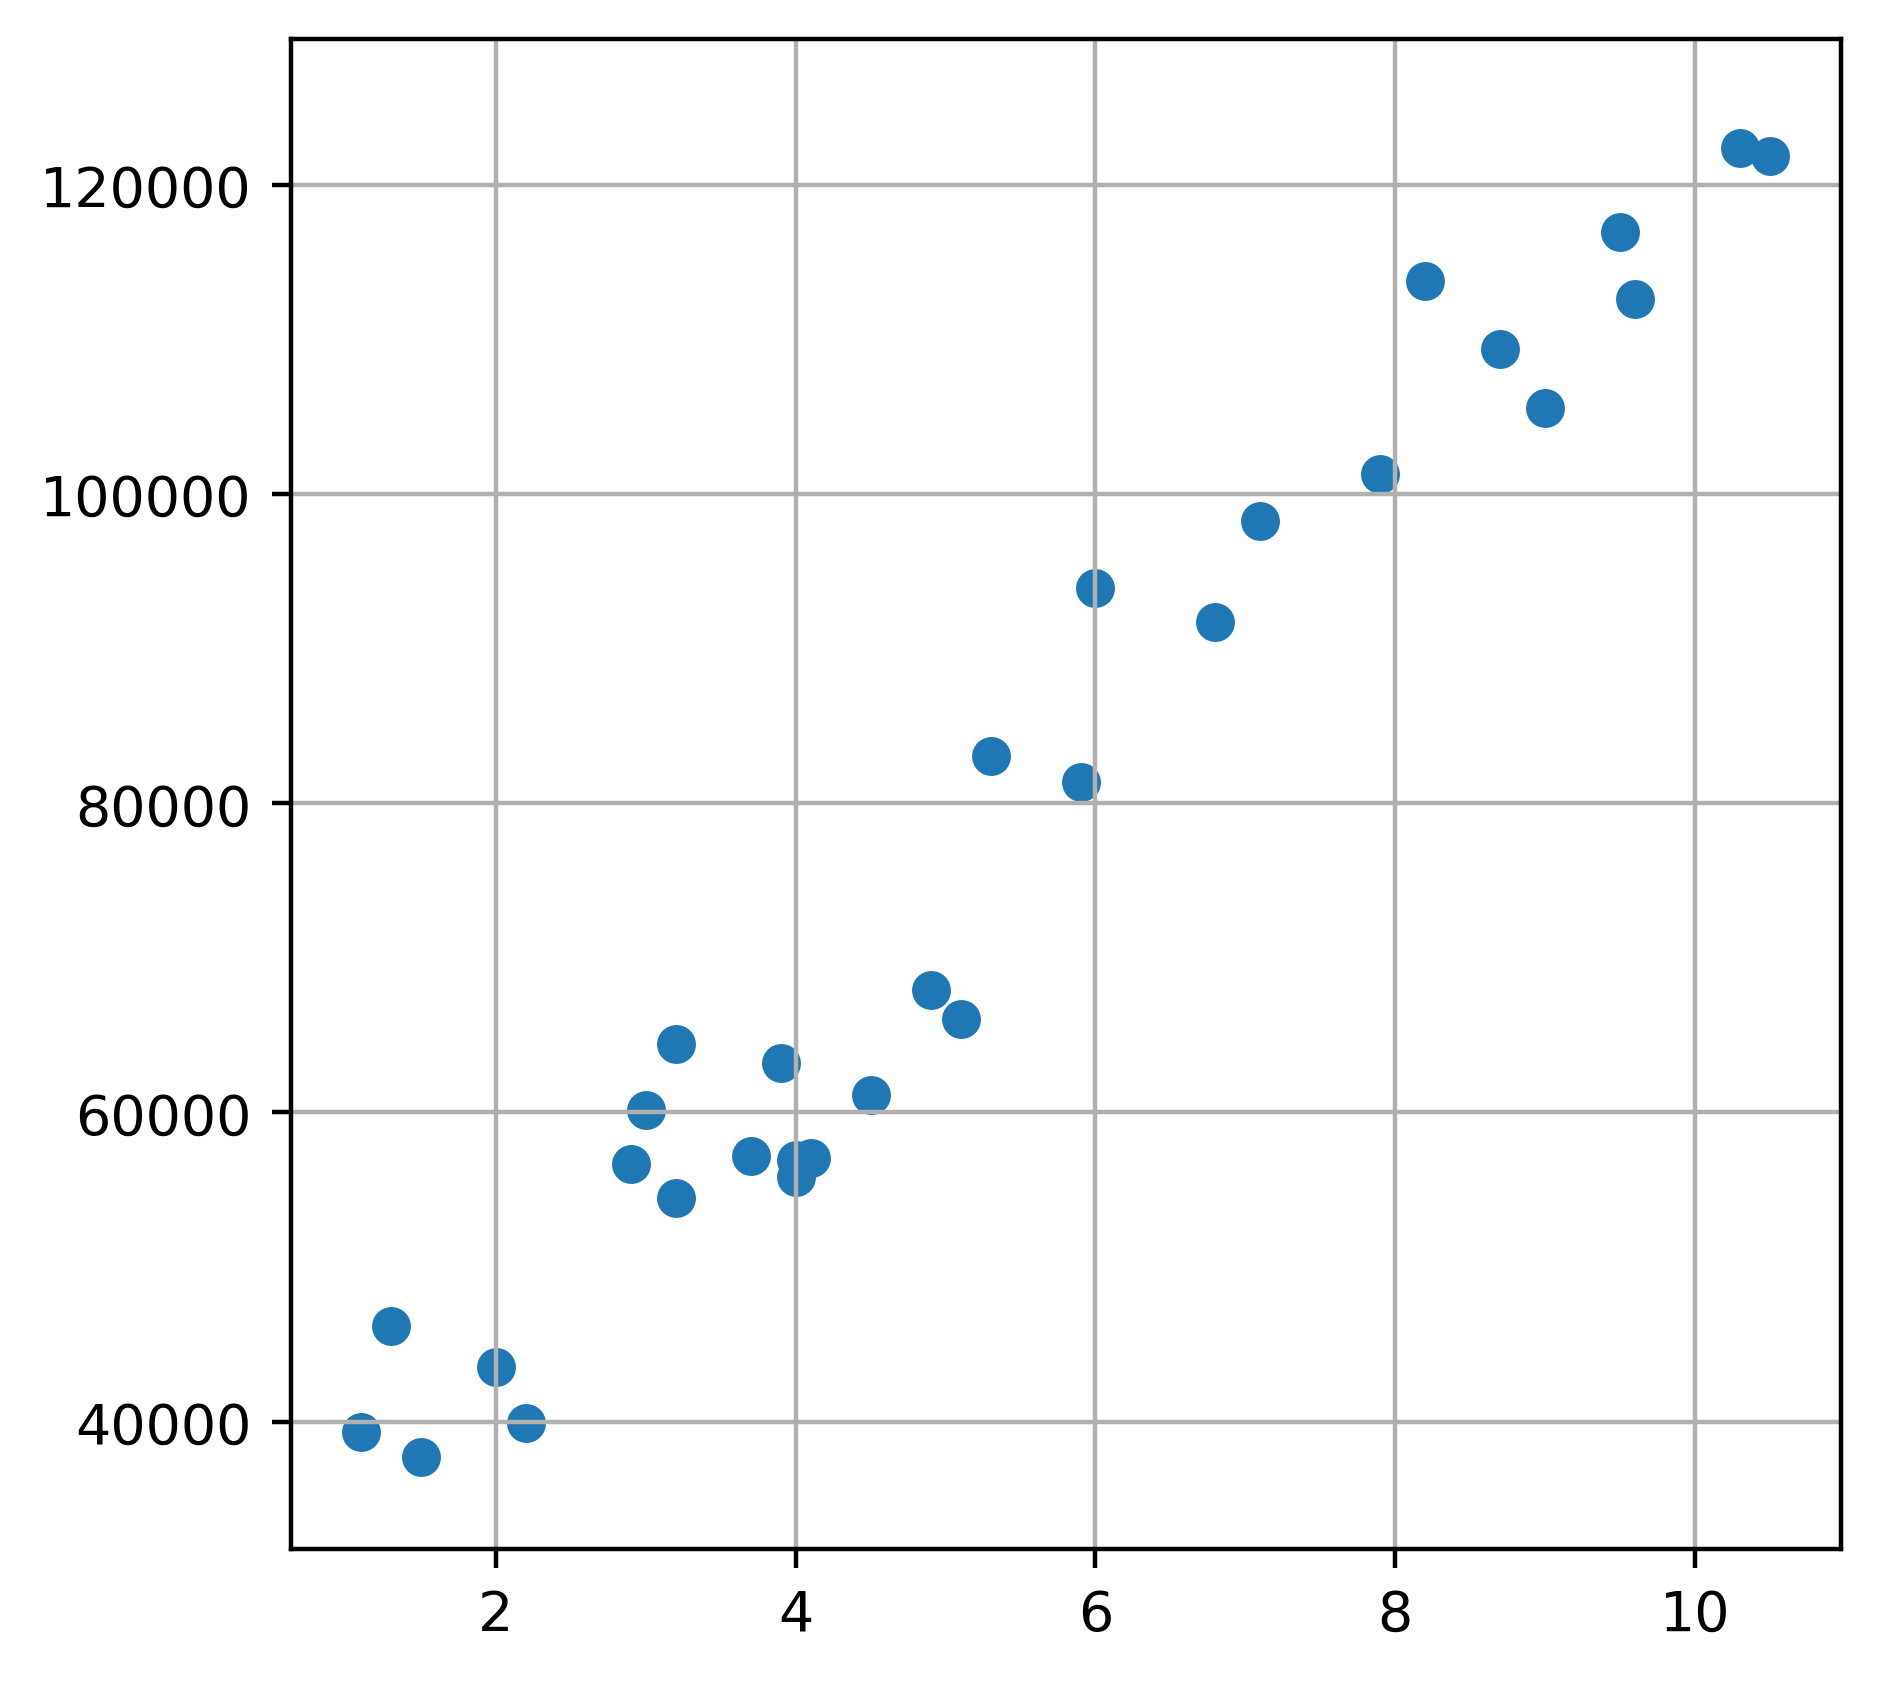

In [ ]:
regressor.visualize()

# Probem 3
## 3.1 Lecture Requirement
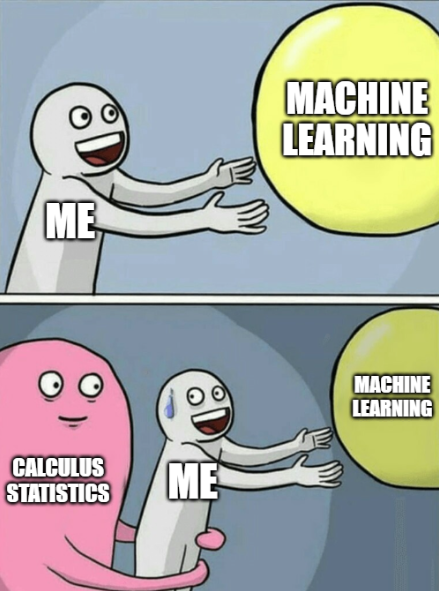


The figure above is a meme that I created based on my personal experience this semester. I was very excited to learn more about machine learning this semester but when Engr. Lopez introduced the topic of Linear Regression which includes some of the previous lessons from statistics and Calculus, I started having that expression in the second panel. I was actually quite happy when I finished Calculus up until Differential Equations because I can now finally forget all the formulas and processes that they made us remember. Now that  I'm taking up AIDA machine learning course, I learned that in order to fully learn Machine Learning, I must still have adequate knowledge to both statistics and Calculus.

**References:**

[1] Shrikant I. Bangdiwala (2018) Regression: simple linear, International Journal of Injury Control and Safety Promotion, 25:1, 113-115, DOI: 10.1080/17457300.2018.1426702